In [1]:
#Import all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [2]:
#Read given data into dataframes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Get shapes of input data
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
target = train.Survived

In [8]:
#Let's combine train and test together
train.drop(['Survived'],inplace=True,axis=1)
whole = train.append(test)

In [9]:
#Let's now check how each feature affects survival rate independently and with combination of another.

In [10]:
train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
whole.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
whole['Title'] = whole['Name'].str.extract('([A-Za-z]+)\.')

In [13]:
whole.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Title, dtype: int64

In [14]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona":"Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [15]:
whole['Title'] = whole['Title'].map(Title_Dictionary)    

In [16]:
titles_dummies = pd.get_dummies(whole['Title'], prefix='Title')
whole = pd.concat([whole, titles_dummies], axis=1)

In [17]:
def getCabinClass(s):
    if s is np.nan:
        return 'U'
    else:
        return s[0]

In [18]:
whole['CabinClass'] = whole['Cabin'].apply(lambda c:getCabinClass(c))

In [19]:
whole.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,CabinClass
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,0,0,U
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,1,0,0,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0,0,0,0,U
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,0,0,0,1,0,0,C
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,0,0,1,0,0,0,U


In [20]:
cabin_dummies = pd.get_dummies(whole['CabinClass'],prefix = 'Cabin')

In [21]:
whole = pd.concat([whole,cabin_dummies],axis=1)

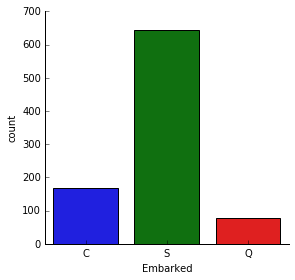

In [22]:
sns.factorplot(x='Embarked',kind='count',data=whole[1:891])

In [23]:
whole['Embarked'].fillna('S',inplace=True)

In [24]:
embarked_dummies = pd.get_dummies(whole['Embarked'],prefix='Embarked')
whole = pd.concat([whole,embarked_dummies],axis=1)

In [25]:
whole['Family'] = whole['SibSp'] + whole['Parch']

In [26]:
whole['Fare'].fillna(whole['Fare'].mean(),inplace=True)

In [27]:
whole.groupby(['Title']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Family
Title,,,,,,,,,,,,,,,,,,,,,
Master,658.852459,2.655738,5.482642,2.049180,1.377049,36.008195,1,0,0,0,...,0.000000,0.032787,0.049180,0.00000,0.000000,0.852459,0.180328,0.081967,0.737705,3.426230
Miss,617.209924,2.335878,21.795236,0.660305,0.500000,42.812486,0,1,0,0,...,0.030534,0.034351,0.015267,0.01145,0.000000,0.770992,0.194656,0.209924,0.595420,1.160305
Mr,659.554822,2.381770,32.252151,0.282695,0.159841,24.807412,0,0,1,0,...,0.030383,0.026420,0.013210,0.00000,0.001321,0.821664,0.183620,0.073976,0.742404,0.442536
Mrs,684.630000,1.940000,36.866279,0.650000,0.820000,50.252562,0,0,0,1,...,0.070000,0.050000,0.020000,0.01000,0.000000,0.615000,0.300000,0.025000,0.675000,1.470000
Officer,661.304348,1.434783,46.272727,0.391304,0.173913,44.392935,0,0,0,0,...,0.043478,0.000000,0.000000,0.00000,0.000000,0.565217,0.217391,0.086957,0.695652,0.565217
Royalty,679.500000,1.000000,41.166667,0.333333,0.000000,53.275000,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333,0.666667,0.000000,0.333333,0.333333


In [28]:
whole[whole.Age.isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Family
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,...,0,0,0,0,0,1,0,1,0,0
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,...,0,0,0,0,0,1,0,0,1,0
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,...,0,0,0,0,0,1,1,0,0,0
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,...,0,0,0,0,0,1,1,0,0,0
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,...,0,0,0,0,0,1,0,1,0,0


In [29]:
grouped_train = whole.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train.head()


,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [30]:
def fillAge(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global whole
    # a function that fills the missing values of the Age variable
    whole['Age'] = whole.apply(lambda row: fillAge(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return whole



In [31]:
whole = process_age()

In [32]:
gender_dummies = pd.get_dummies(whole['Sex'],prefix="Sex")
whole = pd.concat([whole,gender_dummies],axis=1)

In [33]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 34 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Name             1309 non-null object
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
Title            1309 non-null object
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
CabinClass       1309 non-null object
Cabin_A          1309 non-null float64
Cabin_B          1309 non-null float64
Cabin_C          1309 non-null float64
Cabin_D          1309 non-null float64
Cabin_E      

In [34]:
drop_features = ['PassengerId','Name','Sex','Ticket','Cabin','Title','Embarked','CabinClass']

In [35]:
whole.drop(drop_features,axis=1,inplace=True)

In [36]:
whole[:891].head()

,Pclass,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Family,Sex_female,Sex_male
0,3,22,1,0,7.2500,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
1,1,38,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,3,26,0,0,7.9250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,1,35,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
4,3,35,0,0,8.0500,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [37]:
x_tr,x_ts,y_tr,y_ts = train_test_split(whole[:891],target,test_size = 0.3,random_state = 42)

In [38]:
sv = SVC()

In [39]:
sv.fit(x_tr,y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
accuracy_score(y_ts,sv.predict(x_ts))

0.7388059701492538

In [41]:
lr = LogisticRegression(C=1.2,n_jobs=100,max_iter=1000,tol=0.0003)
lr.fit(x_tr,y_tr)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 100.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr',
          n_jobs=100, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0003, verbose=0, warm_start=False)

In [42]:
accuracy_score(y_ts,lr.predict(x_ts))

0.832089552238806

In [43]:
pred = lr.predict(whole[891:])

In [44]:
my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [45]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
accuracy_score(y_ts,dt.predict(x_ts))

0.7873134328358209

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()
rf.fit(x_tr,y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
pred = rf.predict(x_ts)

In [55]:
x_ts.shape

(268, 26)

In [61]:
import tensorflow as tf
import numpy as np

# Dataset
x_data = x_tr
y_data = y_tr

# Hyperparamters
n_input = 26
n_hidden = 10
n_output = 1
lr = 0.1
epochs = 10000
display_step = 1000

# Placeholders
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Weights
W1 = tf.Variable(tf.random_uniform([n_input, n_hidden], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([n_hidden, n_output], -1.0, 1.0))

# Bias
b1 = tf.Variable(tf.zeros([n_hidden]))
b2 = tf.Variable(tf.zeros([n_output]))

L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
hy = tf.sigmoid(tf.matmul(L2, W2) + b2)
cost = tf.reduce_mean(-Y*tf.log(hy) - (1-Y) * tf.log(1-hy))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for step in range(epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {X: x_data, Y: y_data})

        if step % display_step == 0:
            print("Cost: ", c)

    answer = tf.equal(tf.floor(hy + 0.1), Y)
    accuracy = tf.reduce_mean(tf.cast(answer, "float"))

    print(sess.run([hy], feed_dict = {X: x_ts, Y:y_ts}))
    print("Accuracy: ", accuracy.eval({X: x_ts, Y: y_ts}))
    sess.run(pred, feed_dict={X: (whole[891:])})
    my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': pred})
    # you could use any filename. We choose submission here
    my_submission.to_csv('submissionTF.csv', index=False)

('Cost: ', 1.0132701)
('Cost: ', 0.6595969)
('Cost: ', 0.6592529)
('Cost: ', 0.65926707)
('Cost: ', 0.6591367)
('Cost: ', 0.65912926)
('Cost: ', 0.65913826)
('Cost: ', 0.65973675)
('Cost: ', 0.6597909)
('Cost: ', 0.6597945)
[array([[0.36918953],
       [0.3705917 ],
       [0.37059423],
       [0.37048316],
       [0.3708413 ],
       [0.37059563],
       [0.37060046],
       [0.37424335],
       [0.37065887],
       [0.3550459 ],
       [0.4013624 ],
       [0.3705938 ],
       [0.3532276 ],
       [0.37061042],
       [0.37059253],
       [0.37054706],
       [0.371759  ],
       [0.37060156],
       [0.37059247],
       [0.3707034 ],
       [0.37059024],
       [0.370595  ],
       [0.37058082],
       [0.37061393],
       [0.37059757],
       [0.36526152],
       [0.3705927 ],
       [0.37059253],
       [0.3687884 ],
       [0.3705927 ],
       [0.37060526],
       [0.3705916 ],
       [0.3705929 ],
       [0.37059724],
       [0.370641  ],
       [0.3705928 ],
       [0.3830787 ]

TypeError: Fetch argument array([0.9       , 0.5       , 0.1       , 1.        , 0.3       ,
       1.        , 0.79531385, 0.        , 0.82031385, 1.        ,
       0.4       , 0.2       , 0.        , 0.1       , 0.        ,
       1.        , 0.6       , 0.9       , 0.        , 0.        ,
       0.1       , 0.        , 0.2       , 0.        , 0.        ,
       0.        , 0.6       , 0.6       , 0.        , 0.4       ,
       0.21666667, 0.3       , 0.1       , 1.        , 0.38333333,
       0.1       , 0.2       , 0.79531385, 1.        , 0.        ,
       0.        , 0.1       , 0.        , 0.25285714, 0.1       ,
       0.        , 0.53333333, 0.        , 0.5       , 0.2       ,
       1.        , 1.        , 0.        , 1.        , 0.2       ,
       1.        , 0.2       , 1.        , 0.8       , 1.        ,
       0.23333333, 1.        , 1.        , 0.        , 0.25285714,
       0.9       , 0.16666667, 0.2       , 0.2       , 1.        ,
       0.9       , 0.9       , 0.3       , 1.        , 0.        ,
       0.        , 0.6       , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.13785714, 0.2       ,
       0.        , 1.        , 1.        , 0.5       , 0.        ,
       1.        , 0.        , 0.2       , 0.13785714, 0.        ,
       0.2       , 0.        , 0.2       , 1.        , 0.        ,
       0.3       , 0.        , 1.        , 0.        , 0.        ,
       0.56666667, 1.        , 0.5       , 0.        , 0.3       ,
       1.        , 0.        , 1.        , 1.        , 0.2       ,
       0.        , 0.3       , 0.5       , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.5       , 0.7       , 0.        , 0.        ,
       1.        , 0.9       , 0.        , 0.5       , 0.8       ,
       0.1       , 1.        , 0.4       , 0.        , 0.3       ,
       0.        , 1.        , 0.        , 0.        , 0.2       ,
       1.        , 0.1       , 0.9       , 1.        , 0.2       ,
       0.2       , 0.3       , 0.5       , 0.3       , 0.        ,
       0.        , 0.65      , 0.73674242, 1.        , 1.        ,
       0.25789683, 0.        , 0.1       , 1.        , 0.        ,
       0.4       , 0.        , 1.        , 0.        , 0.        ,
       0.8       , 1.        , 1.        , 0.8       , 0.        ,
       0.        , 0.        , 1.        , 0.7       , 0.        ,
       0.        , 0.56666667, 0.36666667, 0.4       , 0.8       ,
       0.1       , 0.        , 0.        , 0.1       , 1.        ,
       0.        , 0.1       , 0.1       , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.6       , 1.        , 0.2       , 0.33111111,
       0.9       , 0.        , 0.5       , 0.4       , 0.        ,
       0.6       , 0.        , 1.        , 0.13785714, 0.        ,
       0.2       , 1.        , 0.3       , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.1       , 0.1       ,
       1.        , 0.        , 0.5       , 1.        , 0.8       ,
       0.        , 0.9       , 0.25285714, 0.9       , 0.        ,
       0.2       , 1.        , 0.1       , 1.        , 0.2       ,
       0.4       , 1.        , 0.        , 0.1       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1       ,
       0.4       , 0.4       , 0.25285714, 0.33111111, 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.9       , 0.4       , 1.        , 0.        , 0.        ,
       0.5       , 0.        , 0.        ]) has invalid type <type 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)